# Manifold Learning

<h3><span style="color:blue">
NOTE:
In this code, all inputs and outputs are <i>column vectors</i>.<br/>
</span></h3>

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## ======== Multidimensional Scaling ============

In [2]:
from sklearn.metrics.pairwise import euclidean_distances

# Helper functions & Datasets
from Code.optimization import conjugate_gradient, gradient_descent
from Code.dataset import tetrahedron, airline_dist, synthetic_spiral

## * Classical MDS

### <span style="color:red">============= Assignment 1 =============</span>
<span style="color:red">
    Complete the function, <b>cmds</b>, for classical mds and run the code with the datasets (tentrahedron, airline distance)
</span>

In [111]:

def cmds(X, n_dim, input_type='raw'):
    if(input_type=='raw'):
        Xt = X.T
        D = euclidean_distances(Xt,Xt)
        
    elif(input_type=='distance'):
        D = X
    else:
        print("Error:invalid input type")
        return
    
    n = len(D)
    p = n_dim
    z = np.zeros((p,n))
    
    I = np.identity(n)
    #print(D)
    
    e = np.array([[1]*n]).T
    
    
    H = I - e.dot(e.T)/n
    
    
    G = -(H.dot(D**2)).dot(H)/2
    
    
    eigVal,eigVec = np.linalg.eigh(G) 
    
    sorted_eigen_indexes = np.argsort(eigVal)[::-1]
    
    eigVal_sorted = eigVal[sorted_eigen_indexes]
    eigVec = eigVec
    eigVec_sorted = eigVec[:,sorted_eigen_indexes]
   
    
    
    x = np.where(eigVal_sorted>0)
    eigVal_sorted_1 = eigVal_sorted[x]
   
    eigVec_sorted_1 = eigVec_sorted.T[x].T
    
    
     
    z = np.dot(eigVec_sorted_1,np.diag(np.sqrt(eigVal_sorted_1))) 
    z=z.T

    return z[:n_dim,:], eigVal_sorted[:n_dim], eigVec_sorted[:,:n_dim]

#### Tetrahedron example (<span style="color:red">part of assignment 1</span>)

<span style="color:red">
    <h4>Print the 3-largest eigen values and its correspoint eigen vectors. </h4>
 You may get the answers which are similar to the follows. <br/><br/>
 The eigen vectors can be different from the proposed answer, but the eigenvalues should be the same.<br/>
 3-largest eigen values: <br/>
 [0.5 0.5 0.5] <br/>
 Corresponding eigen vectors: <br/>
 [[ 0.642617   -0.21226492 -0.68919373  0.25884166] <br/>
 [-0.58000376  0.15992816 -0.31426501  0.73434061] <br/>
 [ 0.02527916 -0.82423697  0.4198208   0.37913701]] <br/>
</span>

In [42]:
tetra_dist = tetrahedron()

n_dim = 3
Y_tetra, evals, evecs = cmds(X=tetra_dist, n_dim=n_dim, input_type='distance')
print('%d-largest eigen values:'% n_dim)
print(evals)
print('Corresponding eigen vectors:\n', evecs.T)

3-largest eigen values:
[0.5 0.5 0.5]
Corresponding eigen vectors:
 [[ 0.86508759 -0.25930798 -0.3240837  -0.28169591]
 [-0.01740518 -0.19912446 -0.57606111  0.79259075]
 [ 0.03633895 -0.80194066  0.55957426  0.20602745]]


<IPython.core.display.Javascript object>


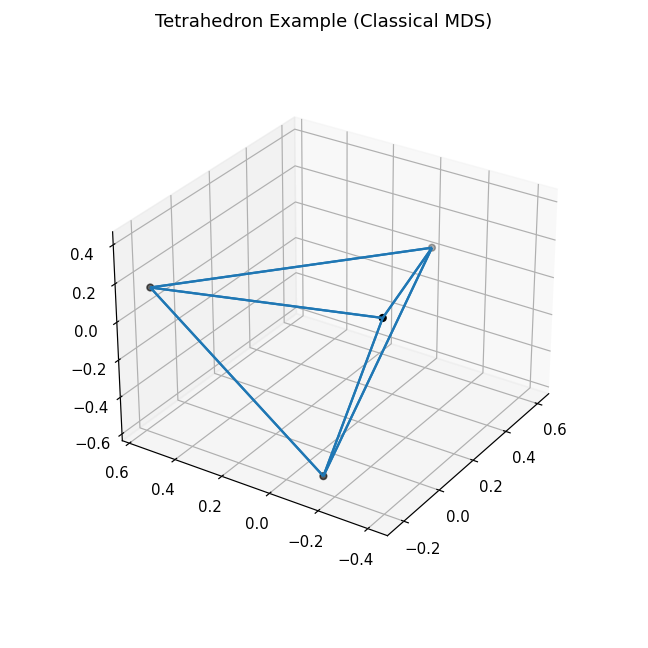

In [43]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

fig_tetra = plt.figure(figsize=(6,6))
fig_tetra.suptitle('Tetrahedron Example (Classical MDS)')
n_pts = Y_tetra.shape[1]
segments = [[Y_tetra[:, i], Y_tetra[:, j]]
        for i in range(n_pts) for j in range(n_pts)]
lc = Line3DCollection(segments,
                zorder=0, cmap=plt.cm.Blues)

ax_tetra = fig_tetra.add_subplot(111, projection='3d')
ax_tetra.scatter(Y_tetra[0,:], Y_tetra[1,:], Y_tetra[2,:], c='k')
ax_tetra.add_collection(lc)
ax_tetra.view_init(29,-147)
ax_tetra.axis('tight');

#### Airline distance Example (<span style="color:red">part of assignment 1</span>)

In [44]:
flying_dist, city = airline_dist()
flying_dist = flying_dist + flying_dist.T

<span style="color:red">
    <h4>Print the 2-largest eigen values and its correspoint eigen vectors.</h4> 
 
 You may get the answers which are similar to the follows. <br/>
 The eigen vectors can be different from the proposed answer, but the eigenvalues should be the same.<br/>
    The eigen vectors have a form of <b>column vector</b>. <br/><br/>
 2-largest eigen values: <br/>
     [4.70997250e+08 3.16544687e+08] <br/><br/>
 Corresponding eigen vectors: <br/>
 [[-0.24499395  0.07171063] <br/>
 [-0.00248515 -0.50378674] <br/>
 [-0.32317913  0.01696098] <br/>
 [-0.04479781  0.48743804] <br/>
 [ 0.14582995 -0.14302017] <br/>
 [-0.3668576   0.12562376] <br/>
 [ 0.28095925  0.27457247] <br/>
 [ 0.27210441  0.11511931] <br/>
 [ 0.01060597 -0.13231822] <br/>
 [-0.20779399 -0.19463378] <br/>
 [ 0.29184348  0.11733994] <br/>
 [ 0.14114669 -0.16226784] <br/>
 [ 0.36369516 -0.17396463] <br/>
 [ 0.10459427 -0.21892974] <br/>
 [ 0.13968383  0.35613124] <br/>
 [-0.37448819 -0.13954413] <br/>
 [ 0.07449426 -0.11091968] <br/>
 [-0.26036144  0.21448856]]
</span>

In [35]:
n_dim = 2
Y_2d_cmds, evals, evecs = cmds(flying_dist, n_dim, input_type='distance')
print('%d-largest eigen values:'% n_dim)
print(evals)
print('\nCorresponding eigen vectors:\n', evecs)

2-largest eigen values:
[4.70997250e+08 3.16544687e+08]

Corresponding eigen vectors:
 [[ 0.24499395 -0.07171063]
 [ 0.00248515  0.50378674]
 [ 0.32317913 -0.01696098]
 [ 0.04479781 -0.48743804]
 [-0.14582995  0.14302017]
 [ 0.3668576  -0.12562376]
 [-0.28095925 -0.27457247]
 [-0.27210441 -0.11511931]
 [-0.01060597  0.13231822]
 [ 0.20779399  0.19463378]
 [-0.29184348 -0.11733994]
 [-0.14114669  0.16226784]
 [-0.36369516  0.17396463]
 [-0.10459427  0.21892974]
 [-0.13968383 -0.35613124]
 [ 0.37448819  0.13954413]
 [-0.07449426  0.11091968]
 [ 0.26036144 -0.21448856]]


<IPython.core.display.Javascript object>


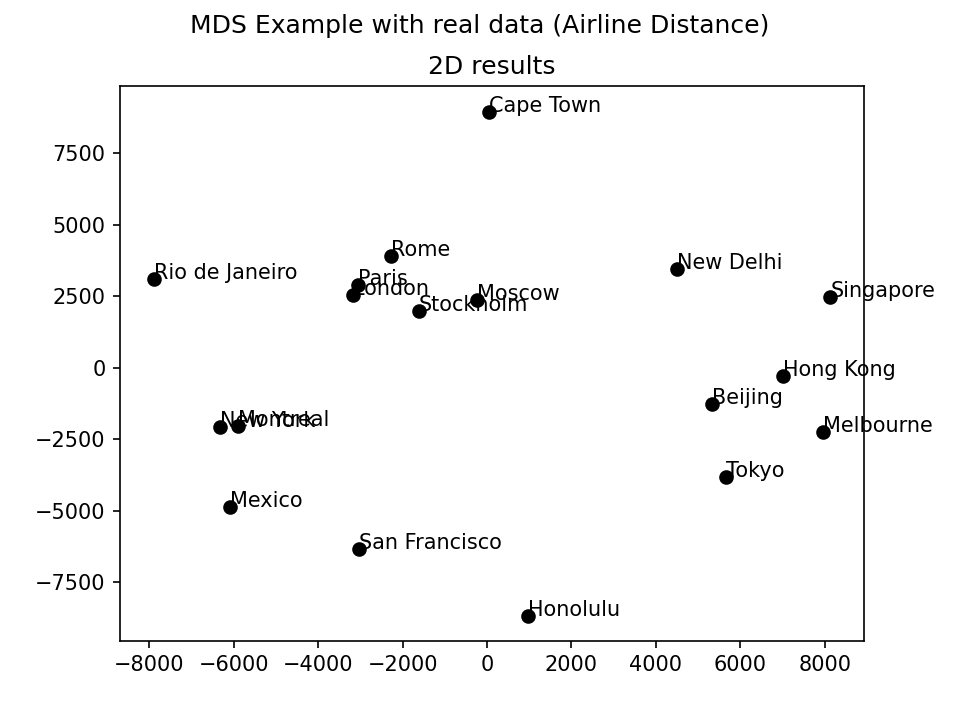

In [46]:
fig = plt.figure()
fig.suptitle('MDS Example with real data (Airline Distance)')

# 2d result
ax_2d = fig.add_subplot()
ax_2d.set_title('2D results')
ax_2d.scatter(Y_2d_cmds[0,:], Y_2d_cmds[1,:], c='k')
for i in range(len(city)):
    ax_2d.text(Y_2d_cmds[0,i], Y_2d_cmds[1,i], city[i])
ax_2d.axis('tight');

### <span style="color:red">=========== End of Assignment 1 ===========</span>

## * Stress-based MDS
### Trade-off (Sammon mapping)

In [13]:
def loss_sammon(D, y):
    """
    Loss function (stress) - Sammon
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points.
        
    Returns
    -------
    stress: scalar. stress
    """
    n, N = y.shape
    
    # calculate distances in target space
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
    
    # add I to the denominator to avoid division by zero
    Dinv = 1. / (D + np.eye(N))
    
    scale = 1 / D.sum()
    delta = d - D
    stress = scale * ((delta**2)*Dinv).sum()
    return stress

def grad_sammon(D, y):
    """
    Gradient function (first derivative) - Sammonn_dim
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points.
        
    Returns
    -------
    g: (k,n) array.
        Gradient matrix. 
        k is the dimensionality of target space.
        n is the number of points.
    """
    n, N = y.shape
    
    # calculate distances in target space
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
        
    scale = 2 / D.sum()
    one = np.ones([n,N])
    
    # add I to the denominator to avoid division by zero
    Dinv = 1 / (D+np.eye(N))
    dinv = 1 / (d+np.eye(N))
    
    delta = (d - D) * Dinv * dinv
    deltaone = np.dot(one,delta)
    g = ((y * deltaone) - np.dot(y,delta)) # gradient
    g = 2 * scale * g
    return g

### <span style="color:red">============= Assignment 2 =============</span>
<span style="color:red">
    Complete the loss functions (<b>loss_abs, grad_abs, loss_rel, grad_rel</b>) for stress-based MDS
</span>

#### <span style="color:red">Absolute Error</span>

In [48]:
def loss_abs(D, y):
    """
    Loss function (stress) - Sammon
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symmetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points.
        
    Returns
    -------
    stress: scalar. stress
    """
    n, N = y.shape
    
    # calculate distances in target space
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
    
    # add I to the denominator to avoid division by zero
    
    
    D_square = D**2
    
    scale = 1 / D_square.sum()
    delta = d - D
    stress = scale * ((delta**2)).sum()
    return stress

In [49]:
def grad_abs(D, y):
    """
    Gradient function (first derivative) - Sammon_dim
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symmetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points.
        
    Returns
    -------
    g: (k,n) array.
        Gradient matrix. 
        k is the dimensionality of target space.
        n is the number of points.
    """
    n, N = y.shape
    
    # calculate distances in target space
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
    
    D_square = D**2
    scale = 4 / D_square.sum()
    one = np.ones([n,N])
    # add I to the denominator to avoid division by zero
    dinv = 1 / (d+np.eye(N))
    delta = (d - D)  * dinv
    deltaone = np.dot(one,delta)
    g = ((y * deltaone) - np.dot(y,delta)) # gradient
    g =  2 * scale * g
    return g

#### <span style="color:red">Relative Error</span>

In [57]:
def loss_rel(D, y):
    """
    Loss function (stress) - Sammon
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symmetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points.
        
    Returns
    -------
    stress: scalar. stress
    """
    n, N = y.shape
    
    # calculate distances in target space
   

    y_t = y.T
    d = euclidean_distances(y_t, y_t)
    
    # add I to the denominator to avoid division by zero
    Dinv = 1. / (D + np.eye(N))
    
    
    delta = d - D
    stress = ((delta*Dinv)**2).sum()
    return stress

In [103]:
def grad_rel(D, y):
    """
    Gradient function (first derivative) - Sammon_dim
    
    Parameters
    ----------
    D: (n,n) array. distance matrix in original space
        This is a symmetric matrix
    y: (d,n) array
        d is the dimensionality of target space.
        n is the number of points.
        
    Returns
    -------
    g: (k,n) array.
        Gradient matrix. 
        k is the dimensionality of target space.
        n is the number of points.
    """
    

    n, N = y.shape
    
    # calculate distances in target space
    y_t = y.T
    d = euclidean_distances(y_t, y_t)
        
    
    one = np.ones([n,N])
    D_squared = D**2
    # add I to the denominator to avoid division by zero
    Dinv = 2 / (D_squared+np.eye(N))
    dinv = 1 / (d+np.eye(N))
    
    delta = (d - D) * Dinv * dinv
    deltaone = np.dot(one,delta)
    g = ((y * deltaone) - np.dot(y,delta)) # gradient
    g = g * 2
    return g

### <span style="color:red">=========== End of Assignment 2 ===========</span>

In [45]:
def stress_based_mds(x, n_dim, loss_f, grad_f, input_type='raw', init='random', 
                     optim='cg', lr=0.5, tol=1e-9, max_iter=1000, init_value=None):
    """
    Stress-based MDS
    
    Parameters
    ----------
    x: (d,n) array or (n,n) array
        If it is raw data -> (d,n) array
        otherwise, (n,n) array (distance matrix)
        n is the number of points
        d is the dimensionality of original space
    n_dim: dimensionality of target space
    cost_f: cost function
    grad_f: gradient function
    input_type: 'raw' or 'distance'
    init: initialisation method
        random: Initial y is set randomly
        fixed: Initial y is set by pre-defined values
    max_iter: maximum iteration of optimization
    init_value: initial value of embedded coordinates.
    
    Returns:
    y: (n_dim,n) array. Embedded coordinates in target space
    """

    # obtain distance
    if input_type == 'raw':
        x_t = x.T
        D = euclidean_distances(x_t, x_t)
    elif input_type == 'distance':
        D = x
    else:
        raise ValueError('inappropriate input_type')
    
    # Remaining initialisation
    N = x.shape[1]

    '''
    ======================= Assignment 3 ===========================
    
    Add code snippets in order to use fixed initial values.
    You can choose the mode by "init" parameter.
        fixed: this means you use fixed initial values 
            which are contained in "init_value" parameter.
        random : this means you use random initialisation.
        
    You may take a form of code like 
        
            
    '''
    if init == 'fixed':
        
        y = init_value
    else:
        y = np.random.normal(0.0,1.0,[n_dim,N])
    # ==================== Assignment 3 ==============================
    # This is a part of assignment 3.
    # Modify this part to set y by init_value.
    
    # Initialise y randomly
    
    # =================================================================

    # calculate optimal solution (embedded coordinates)
    if optim == 'cg': # conjugate gradient
        y = conjugate_gradient(D, y, loss_f, grad_f, max_iter)
    elif optim == 'gd': # gradient descent
        y = gradient_descent(D, y, loss_f, grad_f, lr, tol, max_iter)
    else:
        raise ValueError('inappropriate optim parameter')
    
    return y

### Example with synthetic data (3-D Spiral)

In [46]:
X_spiral = synthetic_spiral()

<IPython.core.display.Javascript object>


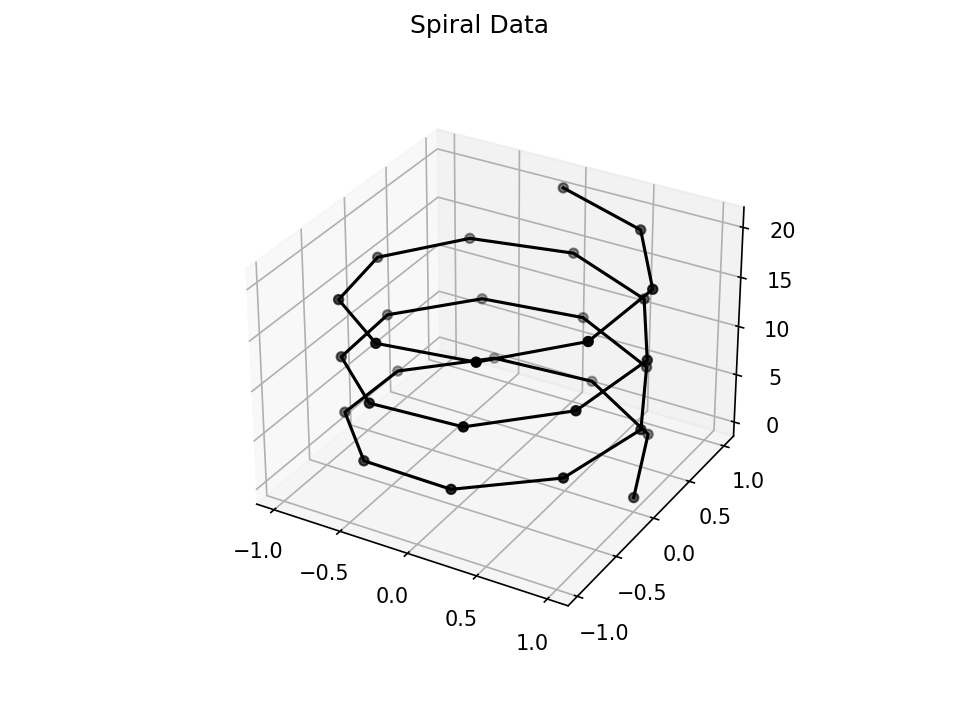

In [20]:
fig = plt.figure()
fig.suptitle('Spiral Data')

# Add 3d scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(X_spiral[0,:], X_spiral[1,:], X_spiral[2,:], c='k')
ax.plot(X_spiral[0,:], X_spiral[1,:], X_spiral[2,:], c='k');

### Random Init.
Every time you run the cells related to random initialisation, you will get different results.

#### Map 3-D data onto 2-D using sammon's error

In [21]:
n_dim = 2
Y_sammon = stress_based_mds(X_spiral, n_dim, loss_sammon, grad_sammon)

Optimization terminated successfully.
         Current function value: 0.001035
         Iterations: 42
         Function evaluations: 244
         Gradient evaluations: 244


<IPython.core.display.Javascript object>


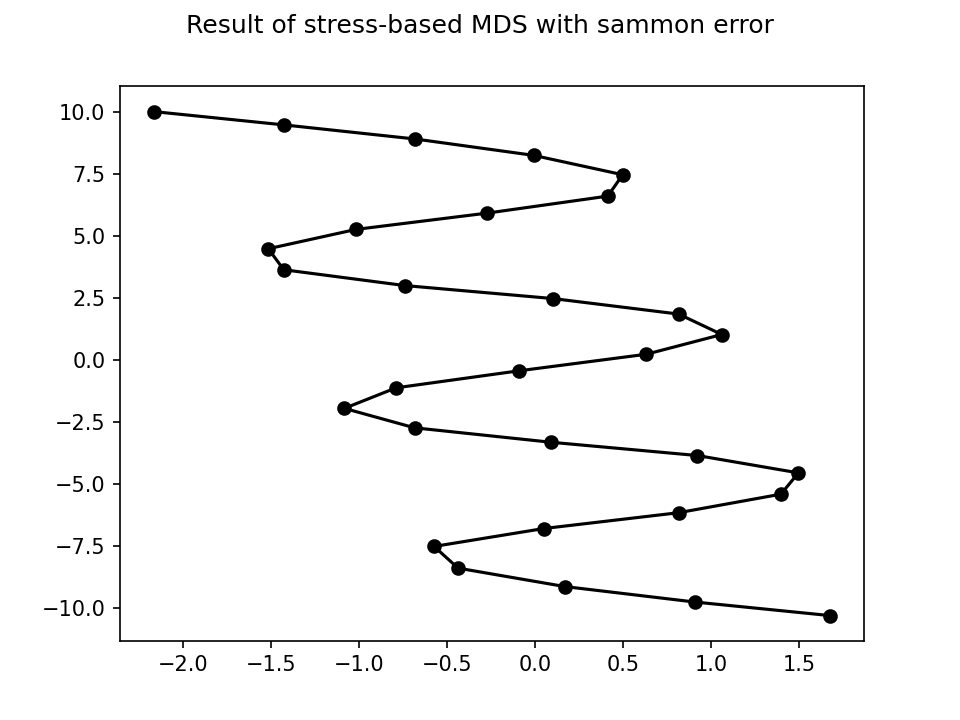

In [22]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with sammon error')

ax = fig.add_subplot()
ax.scatter(Y_sammon[0,:], Y_sammon[1,:], c='k')
ax.plot(Y_sammon[0,:], Y_sammon[1,:], c='k')
ax.axis('tight');

#### <span style="color:red"> Map 3-D data onto 2-D using absolute error</span>

In [50]:
n_dim = 2
Y_abs = stress_based_mds(X_spiral, n_dim, loss_abs, grad_abs)

Optimization terminated successfully.
         Current function value: 0.000349
         Iterations: 41
         Function evaluations: 245
         Gradient evaluations: 245


<IPython.core.display.Javascript object>


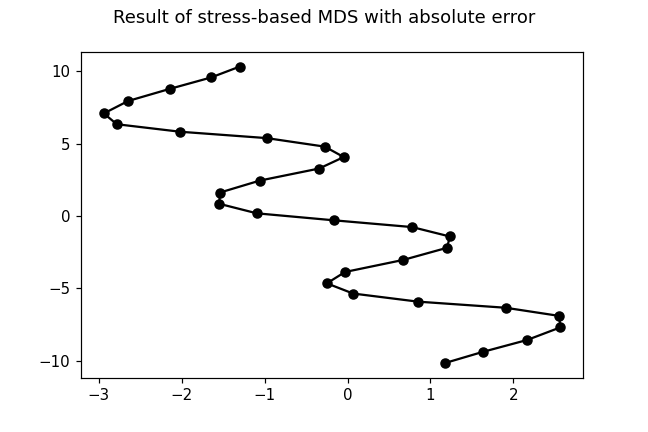

In [51]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with absolute error')

ax = fig.add_subplot()
ax.scatter(Y_abs[0,:], Y_abs[1,:], c='k')
ax.plot(Y_abs[0,:], Y_abs[1,:], c='k')
ax.axis('tight');

#### <span style="color:red"> Map 3-D data onto 2-D using relative error</span>

In [106]:
n_dim = 2
Y_rel = stress_based_mds(X_spiral, n_dim, loss_rel, grad_rel)

Optimization terminated successfully.
         Current function value: 1.777722
         Iterations: 420
         Function evaluations: 644
         Gradient evaluations: 644


<IPython.core.display.Javascript object>


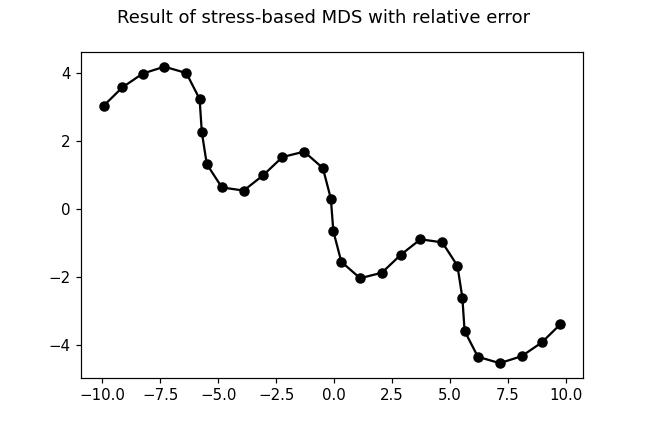

In [107]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with relative error')

ax = fig.add_subplot()
ax.scatter(Y_rel[0,:], Y_rel[1,:], c='k')
ax.plot(Y_rel[0,:], Y_rel[1,:], c='k')
ax.axis('tight');

### Initialisation with fixed value

In [64]:
# fixed init. value
init_y_spiral = np.load('./Data/init_val_spiral.npz')['init']

#### Map 3-D data onto 2-D using sammon's mapping

In [29]:
n_dim = 2
Y_sammon_fixed = stress_based_mds(X_spiral, 
                                  n_dim, 
                                  loss_sammon, 
                                  grad_sammon, 
                                  optim='gd',
                                  lr=0.9,
                                  tol=1e-9,
                                  max_iter=50000,
                                  init='fixed', 
                                  init_value=init_y_spiral)

iter: 0, stress: 1.68e-02, stress variance : 4.61e-03
iter: 50, stress: 1.34e-02, stress variance : 4.42e-03
iter: 100, stress: 1.08e-02, stress variance : 4.24e-03
iter: 150, stress: 8.74e-03, stress variance : 4.04e-03
iter: 200, stress: 7.18e-03, stress variance : 3.81e-03
iter: 250, stress: 5.97e-03, stress variance : 3.54e-03
iter: 300, stress: 5.04e-03, stress variance : 3.23e-03
iter: 350, stress: 4.32e-03, stress variance : 2.90e-03
iter: 400, stress: 3.77e-03, stress variance : 2.55e-03
iter: 450, stress: 3.34e-03, stress variance : 2.22e-03
iter: 500, stress: 3.01e-03, stress variance : 1.91e-03
iter: 550, stress: 2.76e-03, stress variance : 1.64e-03
iter: 600, stress: 2.56e-03, stress variance : 1.39e-03
iter: 650, stress: 2.40e-03, stress variance : 1.18e-03
iter: 700, stress: 2.27e-03, stress variance : 1.01e-03
iter: 750, stress: 2.17e-03, stress variance : 8.63e-04
iter: 800, stress: 2.08e-03, stress variance : 7.42e-04
iter: 850, stress: 2.01e-03, stress variance : 6.44

iter: 7400, stress: 1.08e-03, stress variance : 1.56e-05
iter: 7450, stress: 1.08e-03, stress variance : 1.51e-05
iter: 7500, stress: 1.08e-03, stress variance : 1.47e-05
iter: 7550, stress: 1.08e-03, stress variance : 1.43e-05
iter: 7600, stress: 1.08e-03, stress variance : 1.39e-05
iter: 7650, stress: 1.08e-03, stress variance : 1.35e-05
iter: 7700, stress: 1.08e-03, stress variance : 1.31e-05
iter: 7750, stress: 1.08e-03, stress variance : 1.27e-05
iter: 7800, stress: 1.08e-03, stress variance : 1.24e-05
iter: 7850, stress: 1.08e-03, stress variance : 1.20e-05
iter: 7900, stress: 1.08e-03, stress variance : 1.17e-05
iter: 7950, stress: 1.08e-03, stress variance : 1.13e-05
iter: 8000, stress: 1.08e-03, stress variance : 1.10e-05
iter: 8050, stress: 1.08e-03, stress variance : 1.06e-05
iter: 8100, stress: 1.08e-03, stress variance : 1.03e-05
iter: 8150, stress: 1.07e-03, stress variance : 1.00e-05
iter: 8200, stress: 1.07e-03, stress variance : 9.71e-06
iter: 8250, stress: 1.07e-03, s

iter: 14650, stress: 1.06e-03, stress variance : 1.09e-06
iter: 14700, stress: 1.05e-03, stress variance : 1.08e-06
iter: 14750, stress: 1.05e-03, stress variance : 1.08e-06
iter: 14800, stress: 1.05e-03, stress variance : 1.08e-06
iter: 14850, stress: 1.05e-03, stress variance : 1.08e-06
iter: 14900, stress: 1.05e-03, stress variance : 1.07e-06
iter: 14950, stress: 1.05e-03, stress variance : 1.07e-06
iter: 15000, stress: 1.05e-03, stress variance : 1.07e-06
iter: 15050, stress: 1.05e-03, stress variance : 1.07e-06
iter: 15100, stress: 1.05e-03, stress variance : 1.06e-06
iter: 15150, stress: 1.05e-03, stress variance : 1.06e-06
iter: 15200, stress: 1.05e-03, stress variance : 1.06e-06
iter: 15250, stress: 1.05e-03, stress variance : 1.06e-06
iter: 15300, stress: 1.05e-03, stress variance : 1.06e-06
iter: 15350, stress: 1.05e-03, stress variance : 1.05e-06
iter: 15400, stress: 1.05e-03, stress variance : 1.05e-06
iter: 15450, stress: 1.05e-03, stress variance : 1.05e-06
iter: 15500, s

iter: 21850, stress: 1.05e-03, stress variance : 9.41e-07
iter: 21900, stress: 1.05e-03, stress variance : 9.41e-07
iter: 21950, stress: 1.05e-03, stress variance : 9.41e-07
iter: 22000, stress: 1.05e-03, stress variance : 9.41e-07
iter: 22050, stress: 1.05e-03, stress variance : 9.40e-07
iter: 22100, stress: 1.05e-03, stress variance : 9.40e-07
iter: 22150, stress: 1.05e-03, stress variance : 9.40e-07
iter: 22200, stress: 1.05e-03, stress variance : 9.40e-07
iter: 22250, stress: 1.05e-03, stress variance : 9.40e-07
iter: 22300, stress: 1.05e-03, stress variance : 9.40e-07
iter: 22350, stress: 1.05e-03, stress variance : 9.40e-07
iter: 22400, stress: 1.05e-03, stress variance : 9.40e-07
iter: 22450, stress: 1.05e-03, stress variance : 9.40e-07
iter: 22500, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22550, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22600, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22650, stress: 1.05e-03, stress variance : 9.39e-07
iter: 22700, s

iter: 29100, stress: 1.04e-03, stress variance : 9.27e-07
iter: 29150, stress: 1.04e-03, stress variance : 9.27e-07
iter: 29200, stress: 1.04e-03, stress variance : 9.26e-07
iter: 29250, stress: 1.04e-03, stress variance : 9.25e-07
iter: 29300, stress: 1.04e-03, stress variance : 9.25e-07
iter: 29350, stress: 1.04e-03, stress variance : 9.24e-07
iter: 29400, stress: 1.04e-03, stress variance : 9.23e-07
iter: 29450, stress: 1.04e-03, stress variance : 9.23e-07
iter: 29500, stress: 1.04e-03, stress variance : 9.22e-07
iter: 29550, stress: 1.04e-03, stress variance : 9.21e-07
iter: 29600, stress: 1.04e-03, stress variance : 9.20e-07
iter: 29650, stress: 1.04e-03, stress variance : 9.20e-07
iter: 29700, stress: 1.04e-03, stress variance : 9.19e-07
iter: 29750, stress: 1.04e-03, stress variance : 9.18e-07
iter: 29800, stress: 1.04e-03, stress variance : 9.17e-07
iter: 29850, stress: 1.04e-03, stress variance : 9.16e-07
iter: 29900, stress: 1.04e-03, stress variance : 9.15e-07
iter: 29950, s

iter: 36250, stress: 1.03e-03, stress variance : 6.33e-07
iter: 36300, stress: 1.03e-03, stress variance : 6.30e-07
iter: 36350, stress: 1.03e-03, stress variance : 6.26e-07
iter: 36400, stress: 1.03e-03, stress variance : 6.23e-07
iter: 36450, stress: 1.03e-03, stress variance : 6.20e-07
iter: 36500, stress: 1.03e-03, stress variance : 6.16e-07
iter: 36550, stress: 1.03e-03, stress variance : 6.13e-07
iter: 36600, stress: 1.03e-03, stress variance : 6.10e-07
iter: 36650, stress: 1.03e-03, stress variance : 6.06e-07
iter: 36700, stress: 1.03e-03, stress variance : 6.03e-07
iter: 36750, stress: 1.03e-03, stress variance : 6.00e-07
iter: 36800, stress: 1.03e-03, stress variance : 5.96e-07
iter: 36850, stress: 1.03e-03, stress variance : 5.93e-07
iter: 36900, stress: 1.03e-03, stress variance : 5.90e-07
iter: 36950, stress: 1.03e-03, stress variance : 5.86e-07
iter: 37000, stress: 1.03e-03, stress variance : 5.83e-07
iter: 37050, stress: 1.03e-03, stress variance : 5.80e-07
iter: 37100, s

iter: 43550, stress: 1.03e-03, stress variance : 2.27e-07
iter: 43600, stress: 1.03e-03, stress variance : 2.25e-07
iter: 43650, stress: 1.03e-03, stress variance : 2.24e-07
iter: 43700, stress: 1.03e-03, stress variance : 2.22e-07
iter: 43750, stress: 1.03e-03, stress variance : 2.20e-07
iter: 43800, stress: 1.03e-03, stress variance : 2.19e-07
iter: 43850, stress: 1.03e-03, stress variance : 2.17e-07
iter: 43900, stress: 1.03e-03, stress variance : 2.16e-07
iter: 43950, stress: 1.03e-03, stress variance : 2.14e-07
iter: 44000, stress: 1.03e-03, stress variance : 2.12e-07
iter: 44050, stress: 1.03e-03, stress variance : 2.11e-07
iter: 44100, stress: 1.03e-03, stress variance : 2.09e-07
iter: 44150, stress: 1.03e-03, stress variance : 2.08e-07
iter: 44200, stress: 1.03e-03, stress variance : 2.06e-07
iter: 44250, stress: 1.03e-03, stress variance : 2.05e-07
iter: 44300, stress: 1.03e-03, stress variance : 2.03e-07
iter: 44350, stress: 1.03e-03, stress variance : 2.02e-07
iter: 44400, s

<IPython.core.display.Javascript object>


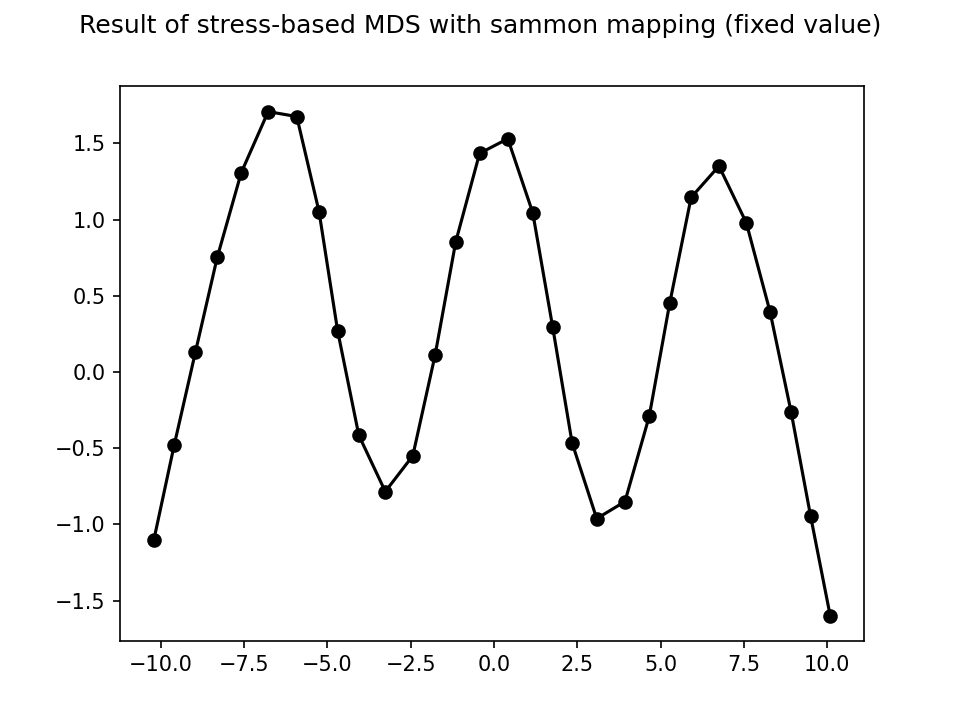

In [47]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with sammon mapping (fixed value)')

ax = fig.add_subplot()
ax.scatter(Y_sammon_fixed[0,:], Y_sammon_fixed[1,:], c='k')
ax.plot(Y_sammon_fixed[0,:], Y_sammon_fixed[1,:], c='k')
ax.axis('tight');

### <span style="color:red">=========== Assignment 3 ===========</span>
<h4>
    <span style="color:red">Run the cells below with fixed initial values.</span>
</h4> <br/>
<span style="color:red">
    1. <b>Add code snippets to set the initial y with fixed values.</b> You can do this by modifying the initialisation part of the <b>stress_based_mds</b> function. <br/>
    2. Run the cells below with the given initial values (<b>init_val_y_spiral</b> for the spiral example, <b>init_val_y_airline_2d, init_val_y_airline_3d</b> for the airline distance example). <br/>
</span>

<br/>
<span style="color:red">
    <b>NOTE:</b>
You will get similar results from the three kinds of the loss functions. Moreover, you will get consistent results from every execution.
</span>

#### <span style="color:red">Map 3-D data onto 2-D using absolute error</span>

In [48]:
# Run this example with gradient descent optimisation.
# It is quite slow, so you need to control hyper-parameters.
# For the usage, please refer to the example of sammon's mapping which is located below

n_dim = 2

# complete this part with the function, stress_based_mds().
# use optim='gd'

learn_rate = 0.9
Y_abs_fixed = stress_based_mds(X_spiral, 
                                  n_dim, 
                                  loss_abs, 
                                  grad_abs, 
                                  optim='gd',
                                  lr=learn_rate,
                                  tol=1e-9,
                                  max_iter=50000,
                                  init='fixed', 
                                  init_value=init_y_spiral)

iter: 0, stress: 7.46e-03, stress variance : 4.79e-03
iter: 50, stress: 5.88e-03, stress variance : 4.68e-03
iter: 100, stress: 4.67e-03, stress variance : 4.55e-03
iter: 150, stress: 3.73e-03, stress variance : 4.41e-03
iter: 200, stress: 3.00e-03, stress variance : 4.23e-03
iter: 250, stress: 2.44e-03, stress variance : 3.99e-03
iter: 300, stress: 2.01e-03, stress variance : 3.71e-03
iter: 350, stress: 1.69e-03, stress variance : 3.39e-03
iter: 400, stress: 1.43e-03, stress variance : 3.04e-03
iter: 450, stress: 1.24e-03, stress variance : 2.68e-03
iter: 500, stress: 1.10e-03, stress variance : 2.33e-03
iter: 550, stress: 9.83e-04, stress variance : 1.99e-03
iter: 600, stress: 8.97e-04, stress variance : 1.68e-03
iter: 650, stress: 8.30e-04, stress variance : 1.41e-03
iter: 700, stress: 7.78e-04, stress variance : 1.17e-03
iter: 750, stress: 7.38e-04, stress variance : 9.65e-04
iter: 800, stress: 7.06e-04, stress variance : 7.98e-04
iter: 850, stress: 6.81e-04, stress variance : 6.61

iter: 7400, stress: 3.89e-04, stress variance : 3.26e-05
iter: 7450, stress: 3.89e-04, stress variance : 3.23e-05
iter: 7500, stress: 3.88e-04, stress variance : 3.20e-05
iter: 7550, stress: 3.87e-04, stress variance : 3.17e-05
iter: 7600, stress: 3.87e-04, stress variance : 3.14e-05
iter: 7650, stress: 3.86e-04, stress variance : 3.12e-05
iter: 7700, stress: 3.85e-04, stress variance : 3.09e-05
iter: 7750, stress: 3.85e-04, stress variance : 3.06e-05
iter: 7800, stress: 3.84e-04, stress variance : 3.03e-05
iter: 7850, stress: 3.84e-04, stress variance : 3.01e-05
iter: 7900, stress: 3.83e-04, stress variance : 2.98e-05
iter: 7950, stress: 3.83e-04, stress variance : 2.95e-05
iter: 8000, stress: 3.82e-04, stress variance : 2.92e-05
iter: 8050, stress: 3.81e-04, stress variance : 2.90e-05
iter: 8100, stress: 3.81e-04, stress variance : 2.87e-05
iter: 8150, stress: 3.80e-04, stress variance : 2.84e-05
iter: 8200, stress: 3.80e-04, stress variance : 2.82e-05
iter: 8250, stress: 3.79e-04, s

iter: 14600, stress: 3.46e-04, stress variance : 5.26e-06
iter: 14650, stress: 3.46e-04, stress variance : 5.18e-06
iter: 14700, stress: 3.45e-04, stress variance : 5.10e-06
iter: 14750, stress: 3.45e-04, stress variance : 5.02e-06
iter: 14800, stress: 3.45e-04, stress variance : 4.94e-06
iter: 14850, stress: 3.45e-04, stress variance : 4.86e-06
iter: 14900, stress: 3.45e-04, stress variance : 4.78e-06
iter: 14950, stress: 3.45e-04, stress variance : 4.71e-06
iter: 15000, stress: 3.45e-04, stress variance : 4.63e-06
iter: 15050, stress: 3.45e-04, stress variance : 4.56e-06
iter: 15100, stress: 3.45e-04, stress variance : 4.49e-06
iter: 15150, stress: 3.45e-04, stress variance : 4.41e-06
iter: 15200, stress: 3.45e-04, stress variance : 4.34e-06
iter: 15250, stress: 3.45e-04, stress variance : 4.28e-06
iter: 15300, stress: 3.45e-04, stress variance : 4.21e-06
iter: 15350, stress: 3.44e-04, stress variance : 4.14e-06
iter: 15400, stress: 3.44e-04, stress variance : 4.08e-06
iter: 15450, s

iter: 21800, stress: 3.40e-04, stress variance : 7.62e-07
iter: 21850, stress: 3.40e-04, stress variance : 7.55e-07
iter: 21900, stress: 3.40e-04, stress variance : 7.48e-07
iter: 21950, stress: 3.40e-04, stress variance : 7.41e-07
iter: 22000, stress: 3.40e-04, stress variance : 7.34e-07
iter: 22050, stress: 3.40e-04, stress variance : 7.28e-07
iter: 22100, stress: 3.40e-04, stress variance : 7.21e-07
iter: 22150, stress: 3.40e-04, stress variance : 7.15e-07
iter: 22200, stress: 3.40e-04, stress variance : 7.09e-07
iter: 22250, stress: 3.40e-04, stress variance : 7.03e-07
iter: 22300, stress: 3.40e-04, stress variance : 6.96e-07
iter: 22350, stress: 3.40e-04, stress variance : 6.90e-07
iter: 22400, stress: 3.40e-04, stress variance : 6.85e-07
iter: 22450, stress: 3.40e-04, stress variance : 6.79e-07
iter: 22500, stress: 3.40e-04, stress variance : 6.73e-07
iter: 22550, stress: 3.40e-04, stress variance : 6.67e-07
iter: 22600, stress: 3.40e-04, stress variance : 6.62e-07
iter: 22650, s

iter: 29150, stress: 3.39e-04, stress variance : 2.94e-07
iter: 29200, stress: 3.39e-04, stress variance : 2.93e-07
iter: 29250, stress: 3.39e-04, stress variance : 2.91e-07
iter: 29300, stress: 3.39e-04, stress variance : 2.90e-07
iter: 29350, stress: 3.39e-04, stress variance : 2.88e-07
iter: 29400, stress: 3.39e-04, stress variance : 2.87e-07
iter: 29450, stress: 3.39e-04, stress variance : 2.85e-07
iter: 29500, stress: 3.39e-04, stress variance : 2.84e-07
iter: 29550, stress: 3.39e-04, stress variance : 2.83e-07
iter: 29600, stress: 3.39e-04, stress variance : 2.81e-07
iter: 29650, stress: 3.39e-04, stress variance : 2.80e-07
iter: 29700, stress: 3.39e-04, stress variance : 2.78e-07
iter: 29750, stress: 3.39e-04, stress variance : 2.77e-07
iter: 29800, stress: 3.39e-04, stress variance : 2.76e-07
iter: 29850, stress: 3.39e-04, stress variance : 2.74e-07
iter: 29900, stress: 3.39e-04, stress variance : 2.73e-07
iter: 29950, stress: 3.39e-04, stress variance : 2.72e-07
iter: 30000, s

iter: 36500, stress: 3.39e-04, stress variance : 1.50e-07
iter: 36550, stress: 3.39e-04, stress variance : 1.49e-07
iter: 36600, stress: 3.39e-04, stress variance : 1.49e-07
iter: 36650, stress: 3.39e-04, stress variance : 1.48e-07
iter: 36700, stress: 3.39e-04, stress variance : 1.47e-07
iter: 36750, stress: 3.39e-04, stress variance : 1.47e-07
iter: 36800, stress: 3.39e-04, stress variance : 1.46e-07
iter: 36850, stress: 3.39e-04, stress variance : 1.45e-07
iter: 36900, stress: 3.39e-04, stress variance : 1.45e-07
iter: 36950, stress: 3.39e-04, stress variance : 1.44e-07
iter: 37000, stress: 3.39e-04, stress variance : 1.44e-07
iter: 37050, stress: 3.39e-04, stress variance : 1.43e-07
iter: 37100, stress: 3.39e-04, stress variance : 1.42e-07
iter: 37150, stress: 3.39e-04, stress variance : 1.42e-07
iter: 37200, stress: 3.39e-04, stress variance : 1.41e-07
iter: 37250, stress: 3.39e-04, stress variance : 1.41e-07
iter: 37300, stress: 3.39e-04, stress variance : 1.40e-07
iter: 37350, s

iter: 43650, stress: 3.38e-04, stress variance : 8.51e-08
iter: 43700, stress: 3.38e-04, stress variance : 8.48e-08
iter: 43750, stress: 3.38e-04, stress variance : 8.45e-08
iter: 43800, stress: 3.38e-04, stress variance : 8.42e-08
iter: 43850, stress: 3.38e-04, stress variance : 8.39e-08
iter: 43900, stress: 3.38e-04, stress variance : 8.36e-08
iter: 43950, stress: 3.38e-04, stress variance : 8.33e-08
iter: 44000, stress: 3.38e-04, stress variance : 8.30e-08
iter: 44050, stress: 3.38e-04, stress variance : 8.27e-08
iter: 44100, stress: 3.38e-04, stress variance : 8.24e-08
iter: 44150, stress: 3.38e-04, stress variance : 8.21e-08
iter: 44200, stress: 3.38e-04, stress variance : 8.18e-08
iter: 44250, stress: 3.38e-04, stress variance : 8.15e-08
iter: 44300, stress: 3.38e-04, stress variance : 8.12e-08
iter: 44350, stress: 3.38e-04, stress variance : 8.09e-08
iter: 44400, stress: 3.38e-04, stress variance : 8.07e-08
iter: 44450, stress: 3.38e-04, stress variance : 8.04e-08
iter: 44500, s

<IPython.core.display.Javascript object>


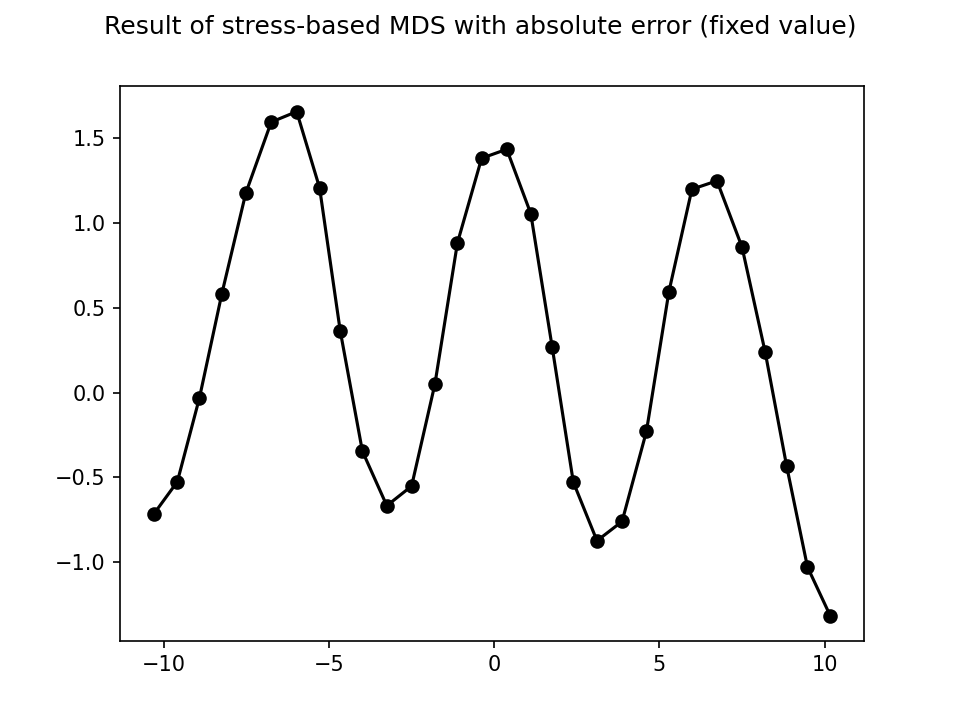

In [49]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with absolute error (fixed value)')

ax = fig.add_subplot()
ax.scatter(Y_abs_fixed[0,:], Y_abs_fixed[1,:], c='k')
ax.plot(Y_abs_fixed[0,:], Y_abs_fixed[1,:], c='k')
ax.axis('tight');

#### <span style="color:red">Map 3-D data onto 2-D using relative error</span>

In [104]:
# Run this example with gradient descent optimisation.
# It is quite slow, so you need to control hyper-parameters.
# For the usage, please refer to the example of sammon's mapping which is located below

n_dim = 2

# complete this part with the function, stress_based_mds().
# use optim='gd'

learn_rate = 0.1
Y_rel_fixed = stress_based_mds(X_spiral, 
                                  n_dim, 
                                  loss_rel, 
                                  grad_rel, 
                                  optim='gd',
                                  lr=learn_rate,
                                  tol=1e-9,
                                  max_iter=100000,
                                  init='fixed', 
                                  init_value=init_y_spiral)

iter: 0, stress: 4.46e+01, stress variance : 7.73e-01
iter: 50, stress: 1.89e+00, stress variance : 3.18e-04
iter: 100, stress: 1.87e+00, stress variance : 2.10e-04
iter: 150, stress: 1.85e+00, stress variance : 1.61e-04
iter: 200, stress: 1.84e+00, stress variance : 9.37e-05
iter: 250, stress: 1.83e+00, stress variance : 5.15e-05
iter: 300, stress: 1.83e+00, stress variance : 3.15e-05
iter: 350, stress: 1.83e+00, stress variance : 2.16e-05
iter: 400, stress: 1.82e+00, stress variance : 1.62e-05
iter: 450, stress: 1.82e+00, stress variance : 1.31e-05
iter: 500, stress: 1.82e+00, stress variance : 1.15e-05
iter: 550, stress: 1.82e+00, stress variance : 1.13e-05
iter: 600, stress: 1.82e+00, stress variance : 1.26e-05
iter: 650, stress: 1.82e+00, stress variance : 1.43e-05
iter: 700, stress: 1.82e+00, stress variance : 1.18e-05
iter: 750, stress: 1.82e+00, stress variance : 5.81e-06
iter: 800, stress: 1.82e+00, stress variance : 2.92e-06
iter: 850, stress: 1.82e+00, stress variance : 2.05

<IPython.core.display.Javascript object>


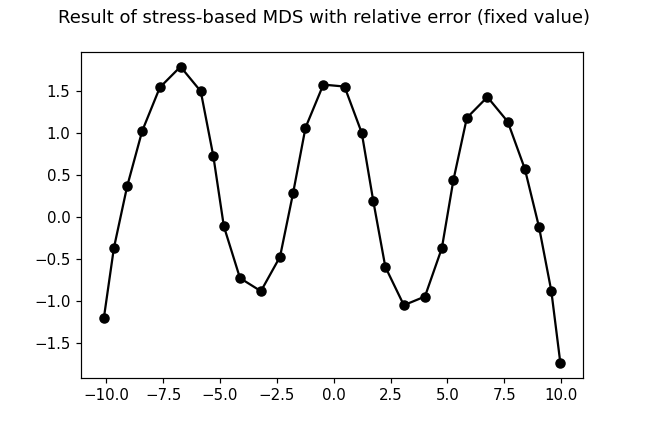

In [108]:
fig = plt.figure()
fig.suptitle('Result of stress-based MDS with relative error (fixed value)')

ax = fig.add_subplot()
ax.scatter(Y_rel_fixed[0,:], Y_rel_fixed[1,:], c='k')
ax.plot(Y_rel_fixed[0,:], Y_rel_fixed[1,:], c='k')
ax.axis('tight');

### <span style="color:red">Example with real data (Airline Distance)</span>

In [52]:
flying_dist, city = airline_dist()
flying_dist = flying_dist + flying_dist.T

init_y_airline_2d = np.load('Data/init_val_airline_2d.npz')['init']
init_y_airline_3d = np.load('Data/init_val_airline_3d.npz')['init']

In [53]:
# Run this exaple with fixed init values.
# use optim='cg', init='fixed' here
# use loss_sammon, grad_sammon here for loss function 
# and its derivative

# Run it in 2-D space
n_dim = 2

Y_2d = stress_based_mds(flying_dist, 
                                  n_dim, 
                                  loss_sammon, 
                                  grad_sammon, 
                                  optim='gd',
                                  lr=learn_rate,
                                  tol=1e-9,
                                  max_iter=50000,
                                  init='fixed', 
                                  init_value=init_y_airline_2d)
# Run it in 3-D space
n_dim = 3
Y_3d = stress_based_mds(flying_dist, 
                                  n_dim, 
                                  loss_sammon, 
                                  grad_sammon, 
                                  optim='gd',
                                  lr=learn_rate,
                                  tol=1e-9,
                                  max_iter=50000,
                                  init='fixed', 
                                  init_value=init_y_airline_3d)

iter: 0, stress: 4.52e-01, stress variance : 6.19e-10
iter: 0, stress: 3.18e-01, stress variance : 3.07e-10


<IPython.core.display.Javascript object>


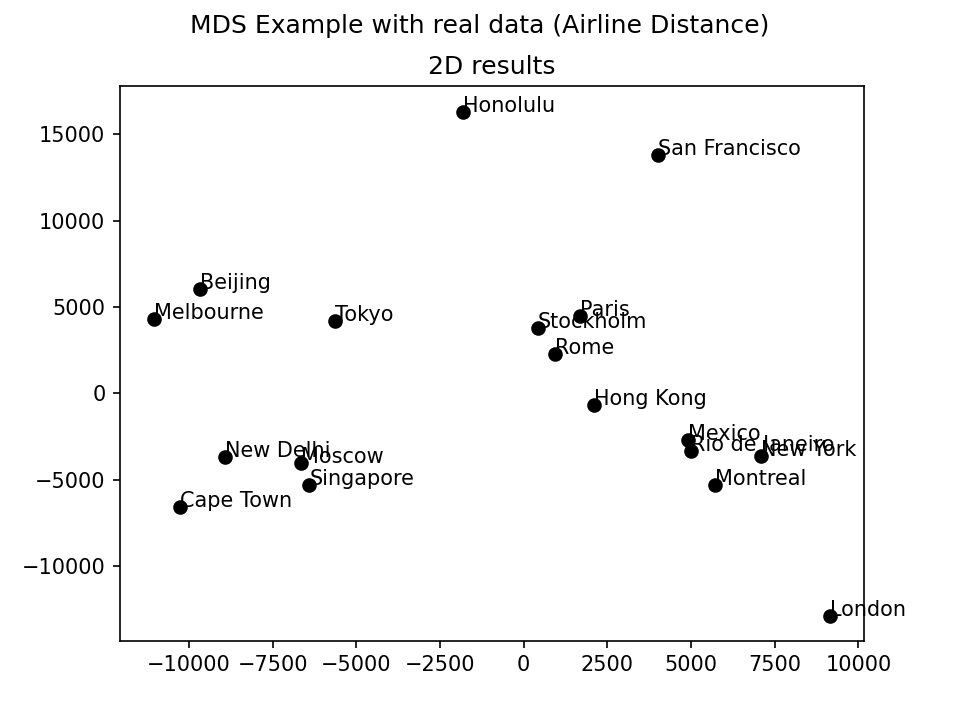

In [54]:
fig = plt.figure()
fig.suptitle('MDS Example with real data (Airline Distance)')

# 2d result
ax_2d = fig.add_subplot()
ax_2d.set_title('2D results')
ax_2d.scatter(Y_2d[0,:], Y_2d[1,:], c='k')
for i in range(len(city)):
    ax_2d.text(Y_2d[0,i], Y_2d[1,i], city[i])
ax_2d.axis('tight');

<IPython.core.display.Javascript object>


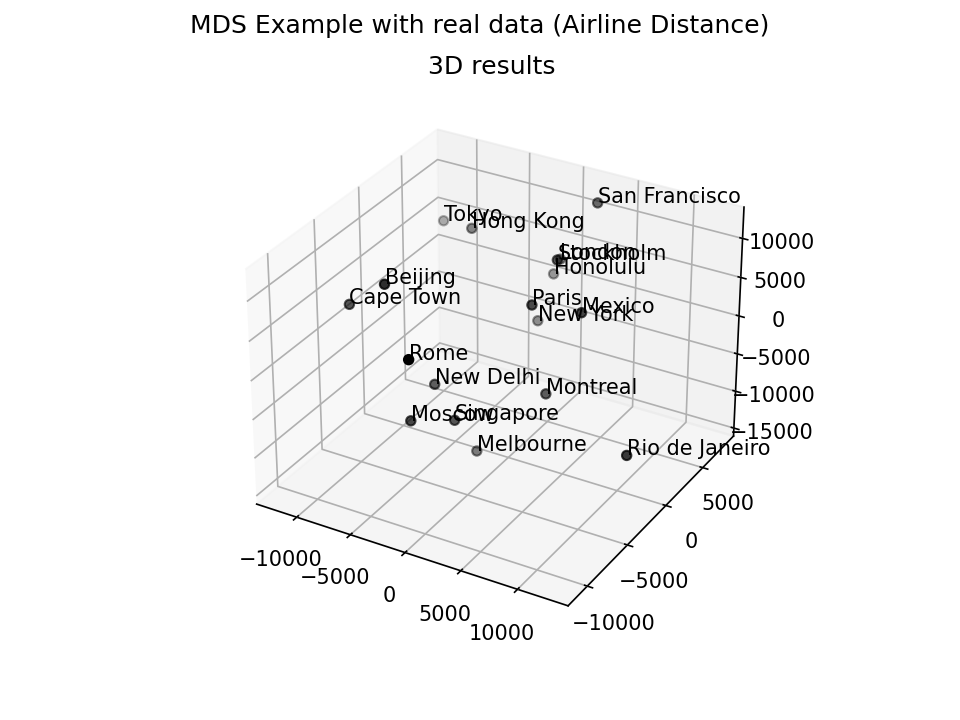

In [55]:
fig = plt.figure()
fig.suptitle('MDS Example with real data (Airline Distance)')

# 3d result
ax_3d = fig.add_subplot(projection='3d')
ax_3d.set_title('3D results')
ax_3d.scatter(Y_3d[0,:], Y_3d[1,:], Y_3d[2,:], c='k')
for i in range(len(city)):
    ax_3d.text(Y_3d[0,i], Y_3d[1,i], Y_3d[2,i], city[i])
ax_3d.axis('tight');

### <span style="color:red">=========== End of Assignment 3 ===========</span>

## ==== Isometric Feature Mapping (ISOMAP) ====

In [56]:
from Code.helpers import VIS, VIS_Shortest_path_2d, ImageViewer

### <span style="color:red">============= Assignment 4 =============</span>
<span style="color:red">
    Implement the function <b>fixed_radius_distance</b> for $\epsilon$-isomap and run the code with swiss roll dataset.</span>

#### <span style="color:red">This is the first part of assignment 4</span>
<span style="color:red">Complete the function (fixed_radius_distance)</span>

In [38]:
# This is the first part of assignment 4 ===============================
def dist_fixed_radius(X, epsilon):
    """
    Calculate distances of neighbors for epsilon-isomap
    
    Parameters
    ----------
    X: (d,n) array, where n is the number of points and d is its dimension
    epsilon: criterion of selecting neighbors
        Select points as its neighbours if distance < epsilon
        
    Returns
    -------
    neighbors: (n,n) array
        It is filled with distances with neighbors. 
        The remaining unreachable distances are set to zero.
        Each row corresponds to a specific point (row-major order)
    """
    
    # Compute distance map
    X_t = X.T
    distances = euclidean_distances(X_t, X_t)
    n = len(distances[1])
    print(n)
    # Keep only distance < epsilon, otherwise set to 0 (= unreachable)
    neighbors = np.zeros_like(distances)
    #print(distances)
    for i in range(0,n):
        for j in range(0,n):
            if(distances[i][j]<epsilon):
                neighbors[i][j]=distances[i][j]
        
     
    # The first part of Assignment 4 =============================
    # Complete here.....
        
    return neighbors

# =======================================================================

### cmds(X, n_dim, input_type)
This is the fuction of classical multidimensional scaling (cmds) which is python extension implemented in c++. Depending on operatign system (os) you use, you need to place dynamic library file (.pyd (windows) or .so (linux)) in the same directory with this notebook file. You can use this function like <br/>
<b>from Code.mds import cmds</b>.

The name of the file is like either mds.cp3x-win_amd64.pyd or mds.cpython-3x-x86_64-linux-gnu.so 
according to the operatin system you use.
Of which, 3x stands for the version of python you use. <br/>
e.g mds.cp37-win_amd64.pyd for Python 3.7

In [30]:
from Code.mds import cmds

from Code.isomap import isomap, nearest_neighbor_distance

### Example with Swiss Roll

In [31]:
from sklearn.datasets import make_swiss_roll

n_points = 1000
data_s_roll, color = make_swiss_roll(n_points)
data_s_roll = data_s_roll.T

<IPython.core.display.Javascript object>


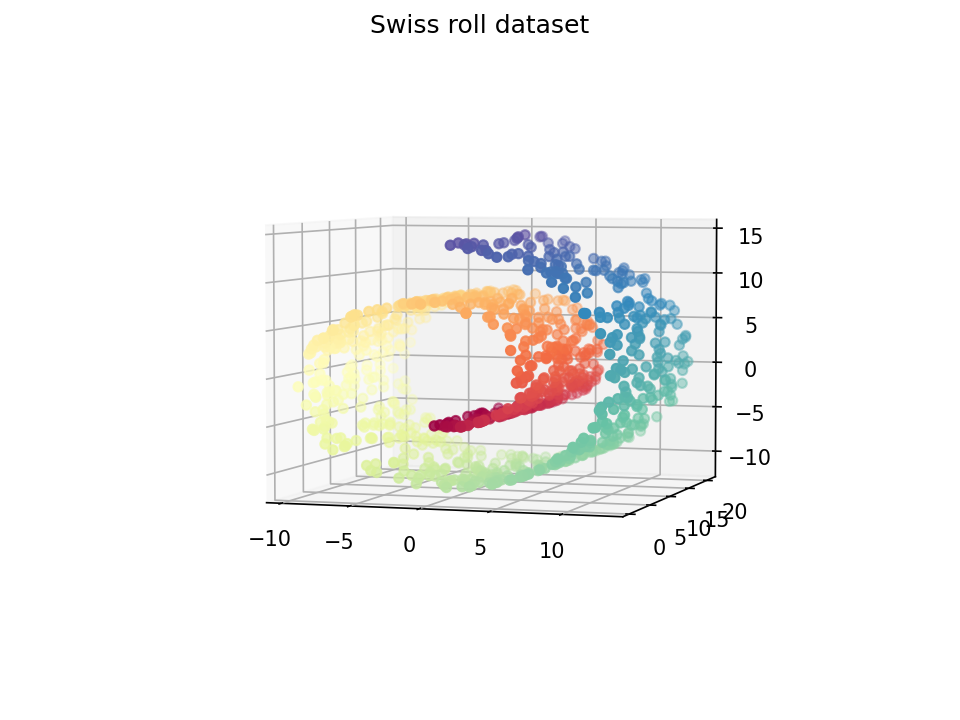

In [32]:
fig_swiss_roll = plt.figure()
fig_swiss_roll.suptitle("Swiss roll dataset")

# Add 3d scatter plot
ax = fig_swiss_roll.add_subplot(projection='3d')
ax.scatter(data_s_roll[0,:], data_s_roll[1,:], data_s_roll[2,:], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72);

In [33]:
n_components = 2
n_neighbors = 6
Y_nn, dist_nn, predecessors_nn = isomap(data_s_roll, 
                                        n_components, 
                                        dist_type='nearest', 
                                        n_neighbors=n_neighbors, 
                                        dist_func=nearest_neighbor_distance, 
                                        cmds_func=cmds)

<IPython.core.display.Javascript object>


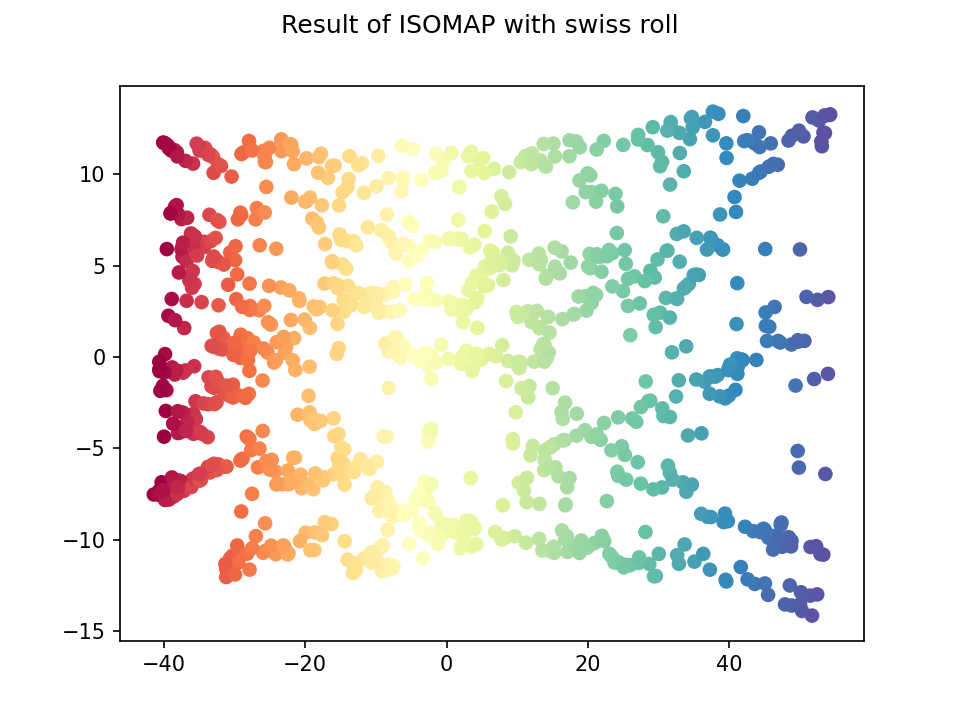

In [59]:
fig_nn_result = plt.figure()
fig_nn_result.suptitle("Result of ISOMAP with swiss roll")

ax = fig_nn_result.add_subplot()
ax.scatter(Y_nn[0,:], Y_nn[1,:], c=color, cmap=plt.cm.Spectral)
ax.axis('tight');

#### <span style="color:red">This is the second part of assignment 4</span>
<span style="color:red">Run the code with Swiss roll dataset to demonstrate the **fixed_radius_distance** function($\epsilon$-isomap)</span>

In [57]:
epsilon = 3.5
Y_radius, dist_radius, predecessors_radius = isomap(data_s_roll, n_components, 
                                                    dist_type='radius', 
                                                    epsilon=epsilon, 
                                                    dist_func=dist_fixed_radius, 
                                                    cmds_func=cmds)

1000


<IPython.core.display.Javascript object>


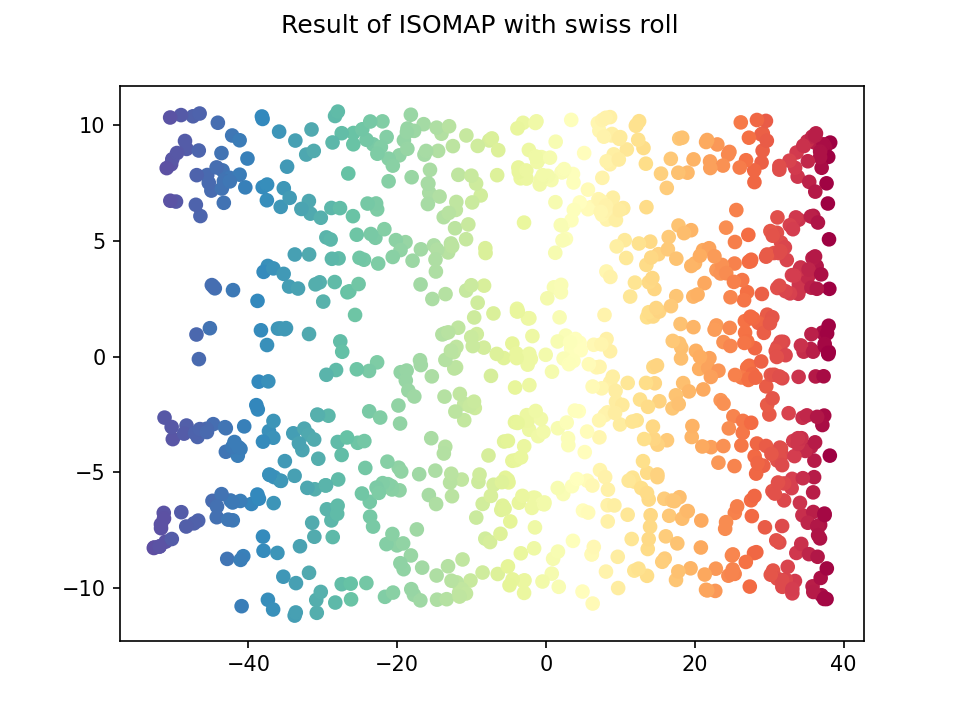

In [58]:
fig_radius_result = plt.figure()
fig_radius_result.suptitle("Result of ISOMAP with swiss roll")

ax = fig_radius_result.add_subplot()
ax.scatter(Y_radius[0,:], Y_radius[1,:], c=color, cmap=plt.cm.Spectral)
ax.axis('tight');

### <span style="color:red">=========== End of Assignment 4 ===========</span>
<span style="color:red">

### Example with face data

In [60]:
from Code.dataset import face_tenenbaum
from Code.isomap import isomap, nearest_neighbor_distance
from Code.mds import cmds
from Code.helpers import VIS
from Code.helpers import VIS_Shortest_path_2d
from Code.helpers import ImageViewer
data_face = face_tenenbaum()
#print(data_face.shape)
image_size = [64,64]

In [61]:
n_components = 2
n_neighbors = 6
Y_face, dist_face, predecessors_face = isomap(data_face, n_components, 
                                              dist_type='nearest', 
                                              n_neighbors=n_neighbors, 
                                              dist_func=nearest_neighbor_distance, 
                                              cmds_func=cmds)

<IPython.core.display.Javascript object>


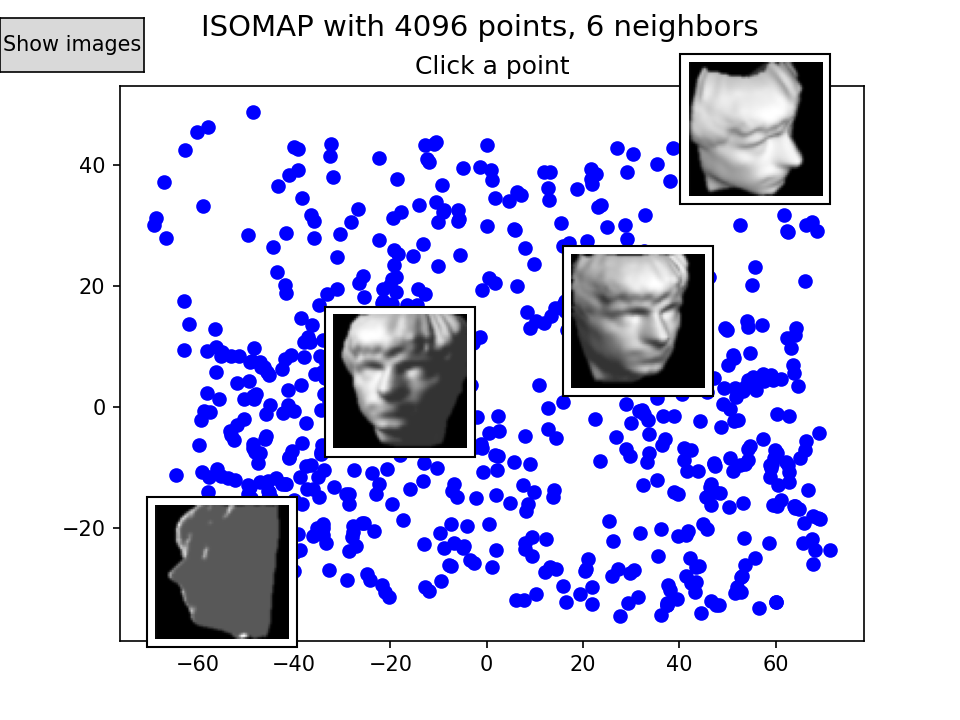

In [62]:
fig_face = plt.figure()
fig_face.suptitle("ISOMAP with %i points, %i neighbors"
            % (data_face.shape[0], n_neighbors), fontsize=14)
vis_face = VIS(data_face, Y_face, fig_face, img_size=image_size)

### <span style="color:red">============= Assignment 5 =============</span>
<span style="color:red">Pick <b>two points</b> both vertically and horizontally and show images on each path. Describe what you observe on those points in two paths in terms of manifold learning. You can use <b>VIS_Shortest_path_2d</b> for selecting two points , which is provided for the convenience. Also, for displaying images, <b>ImageViewer</b> class can be used.</span> <br/>

#### Shortest path of specific two points

In [63]:
def get_shortest_path(predecessors, start_idx, end_idx):
    path = [end_idx]
    k = end_idx
    while predecessors[start_idx, k] != -9999:
        path.append(predecessors[start_idx, k])
        k = predecessors[start_idx, k]
    return path[::-1]

#### Horizontal Path

<IPython.core.display.Javascript object>


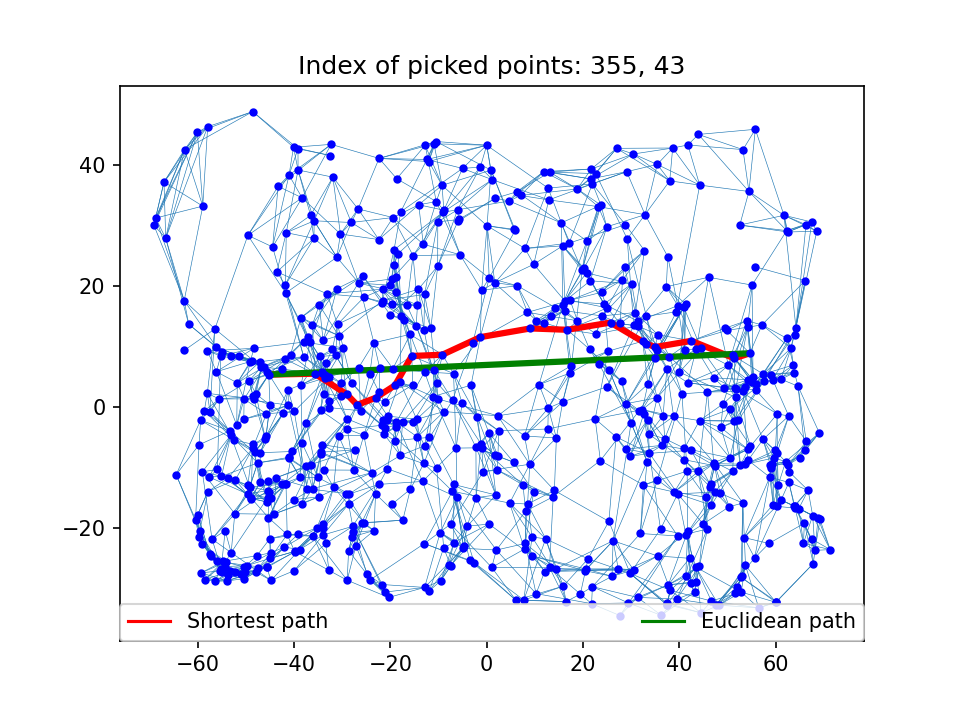

In [64]:
fig_face_index_h = plt.figure()
vis_face_index_h = VIS_Shortest_path_2d(Y_face, dist_face, predecessors_face, fig_face_index_h)

In [65]:
# You should input the indices of two points you chose
# using the above figure.
start_idx = 355 # put first index
end_idx =  43 # put second index
path_face_h = get_shortest_path(predecessors_face, start_idx, end_idx)
print(path_face_h)

[355, 226, 651, 73, 131, 638, 265, 600, 79, 82, 363, 126, 30, 342, 380, 301, 43]


<span style="color:red">
    You will get the connectivity of embedded points from the result of the above cell. Select two points. You can identify what you choose at the title of the figure and input the indices as start_index and end_index in the below cell.
</span> <br/><br/>
<span style="color:red">
    For example, if you chose <b>538, 100</b> as start_idx and end_idx, respectively, you will get the indices of the shortest path like <br/>
    <b>[538, 35, 461, 212, 647, 149, 2, 84, 687, 682, 444, 194, 625, 400, 674, 103, 170, 100]</b>
</span><br/><br/>
<span style="color:red">
    The result will <b>vary</b> depending on points you choose. This part is about horizontal path, so please choose a horizontal path.
</span>

<IPython.core.display.Javascript object>


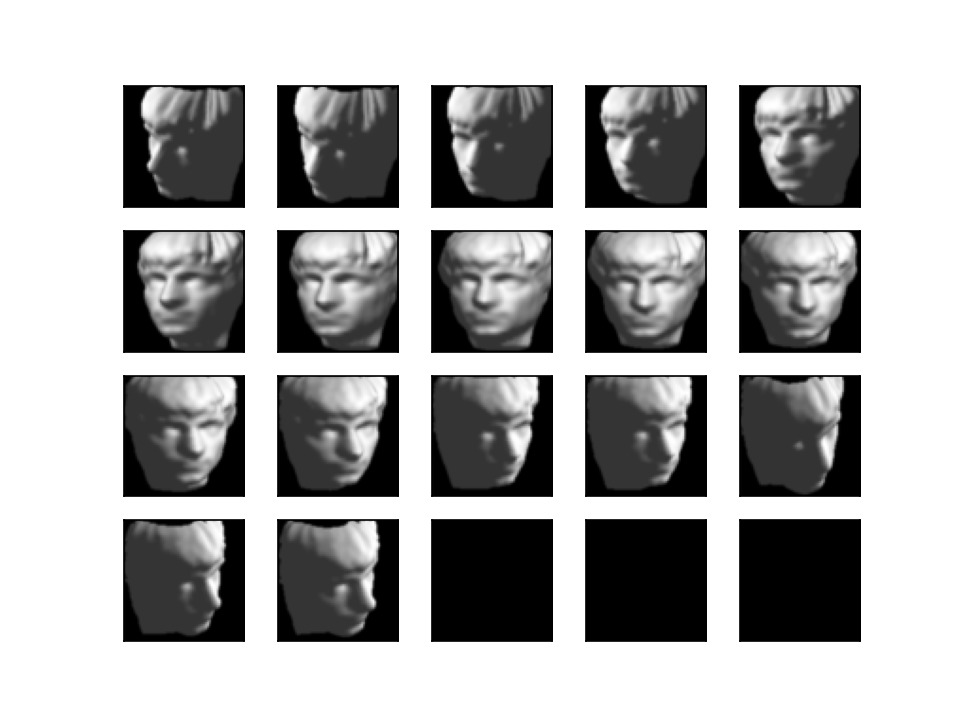

In [66]:
fig_face_h = plt.figure()
img_viewer_h = ImageViewer(data_face, path_face_h, image_size, fig_face_h, 5)
img_viewer_h.show()

#### Vertical Path

<IPython.core.display.Javascript object>


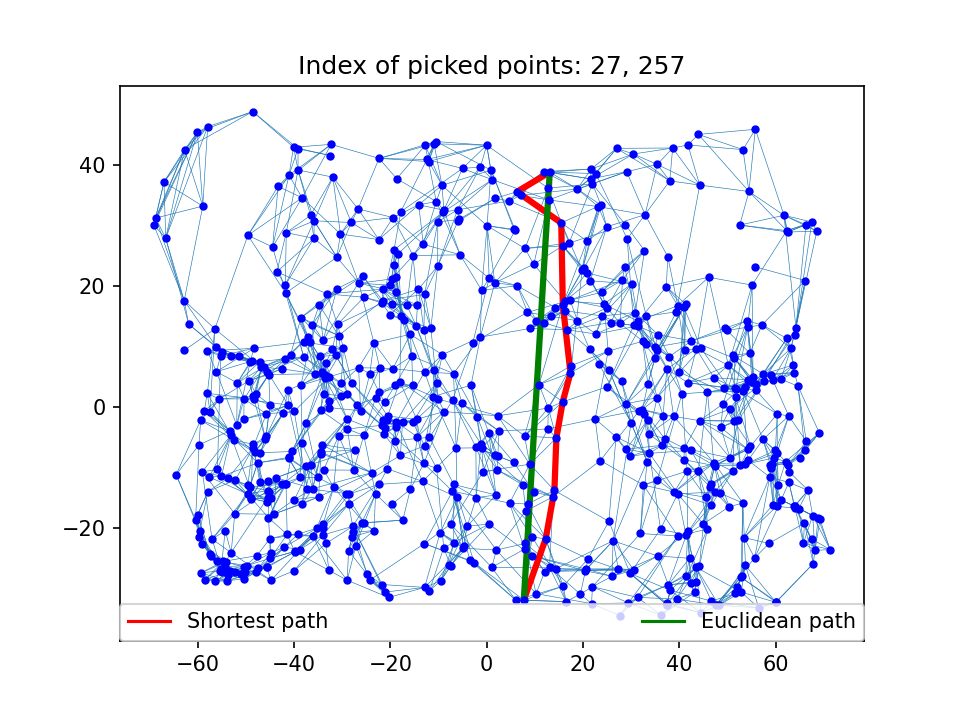

In [67]:
fig_face_index_v = plt.figure()
vis_face_index_v = VIS_Shortest_path_2d(Y_face, dist_face, predecessors_face, fig_face_index_v)

#### <span style="color:red">Please choose a vertical path by selecting two points from the above figrue.</span>
<span style="color:red">You will get the indices of the shortest path from the below cell like <br/>
    <b>[652, 340, 683, 114, 416, 270, 507, 681, 537, 27]</b><br/>
    (in case of start_idx: 662, end_idx: 27)
</span><br/><br/>
<span style="color:red">The result will vary based on the points you choose, but this is about <b>vertical path</b>, so please choose a vertical path.</span>

In [70]:
start_idx =  27 # put first index
end_idx =  257 # put second index
path_face_v = get_shortest_path(predecessors_face, start_idx, end_idx)
print(path_face_v)

[27, 167, 448, 240, 95, 309, 147, 637, 87, 257]


<IPython.core.display.Javascript object>


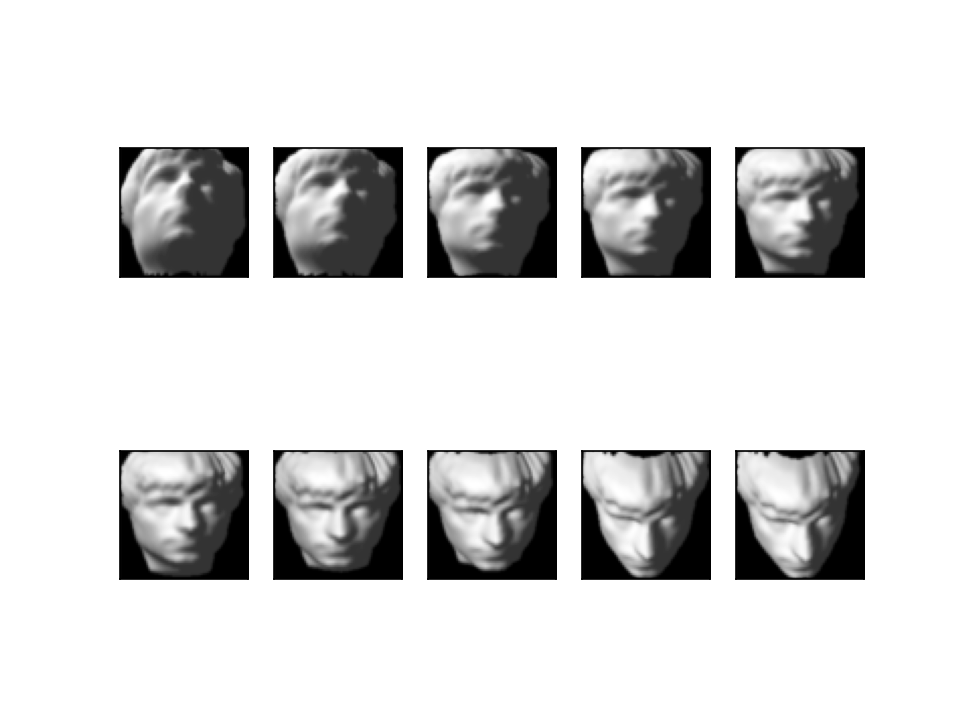

In [71]:
fig_face_v = plt.figure()
img_viewer_v = ImageViewer(data_face, path_face_v, image_size, fig_face_v, 5)
img_viewer_v.show()

## <span style="color:red">Expalin what you observe</span>
<span style="color:red">Please explain what happened on each path. You may talk about the direction of the head.</span>

The Euclidean distance represented by the green lines doesn't represent the actual distance of this data which is a non-linear one, which is why the shortest path represented by red line appears longer. But these two lines are very close. The red line is Geodesic distance, which is truly represented of the distance between the two points in 2-D plane. 
When we select two points on the horizontal axis, and draw the faces in between them, we see that the faces move from left to right or vice-a-versa , which is because the x-axis corresponds to the left-right pose dimensionality.
When we select two points on the vertical axis, and draw the faces in between them, we see that faces move from up-to-down, which is because the y-axis corresponds to the up-down pose dimensionality.


### <span style="color:red">=========== End of Assignment 5 ===========</span>

## ======= Locally Linear Embedding (LLE) =======

In [24]:
from scipy.stats import pearsonr, spearmanr
from Code.helpers import VIS_Bars

### Steps of LLE
1. Select neighbors
2. Reconstruct with linear weights
3. Map to embedded coordinates

In [73]:
from Code.lle import lle

### <span style="color:red">============ Assignment 6 =========== </span>
<span style="color:red">
1. Run LLE with synthetic datasets (<b>S-Curve</b>) <br/>
2. Find <b>the best hyper-parameter</b> to embed the data into 2-D space(the number of neighbours (K) for K-isomap, epsilon ($\epsilon$) for $\epsilon$-isomap). <br/>
3. Describe how to find them. <br/>
4. Plot the values you calculate for selecting the best parameters (e.g. correlation coefficient)
    
You may use <b>correlation coefficient</b> between original manifold coordinates and embedded coordinates. To this end, a build-in function is provided from the scipy package to calculate the correlation coefficient of two vectors (<b>scipy.stats.pearsonr</b>)</span> <br/><br/>

<span style="color:red">
    For the best number of neighbourhood (<b>K</b>), inspect the range <b>from 5 to 50</b> with an interval of 1. For the fixed radius (<b>$\epsilon$</b>), search the range <b>from 0.1 to 0.8</b> with an interval of 0.1.
</span>

### Example (S-curve)

In [17]:
from sklearn.datasets import make_s_curve
n_points = 1000
X, angle = make_s_curve(n_points, random_state=0)
X = X.T


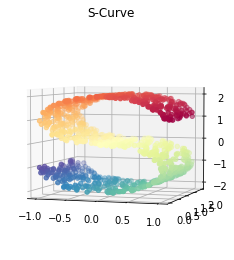

In [12]:
fig_s_curve = plt.figure()
fig_s_curve.suptitle('S-Curve')
    
colorize = dict(c=angle, cmap=plt.cm.Spectral)
# Add 3d scatter plot
ax = fig_s_curve.add_subplot(projection='3d')
ax.scatter(X[0,:], X[1,:], X[2,:], **colorize)
ax.view_init(4, -72)

### <span style="color:red"> Describe how to find the best parameter </span>
<span style="color:red">The aim of manifold learning is embedding data from high dimension to low dimension. To measure the quality of LLE, we can utilise correlation coefficient. The target space is 2-D, so two correlation coefficients should be calculated (one between angle and 1st embedded coordinate (main axis), one between height and 2nd embedded coordinates). Choose the best hyper-parameter which has high correlation in both cases. </span> <br/><br/>

<span style="color:red">
    The best number of neighbour (K): <b>??</b> <br/>
The best fixed radius ($\epsilon$): <b>??</b> <br/>
</span>

[0.59781858 0.7856059  0.97486447 0.98775011 0.98828868 0.99396959
 0.99829815 0.99869292 0.99908035 0.99929361 0.99940889 0.99954388
 0.99976678 0.99972382 0.999794   0.9997749  0.99977588 0.99949654
 0.99982557 0.99986694 0.9996579  0.99975736 0.99992879 0.99992714
 0.99949803 0.9997182  0.99971026 0.9996191  0.99906428 0.99847036
 0.99870398 0.99834417 0.99677764 0.99558274 0.99674808 0.99629457
 0.99551535 0.99751248 0.99816527 0.99899321 0.99931436 0.99930622
 0.99927941 0.99875561 0.99932332 0.9984031 ]
[0.12749241 0.31246571 0.08795299 0.11871697 0.11049112 0.13815912
 0.15596289 0.17208676 0.19923893 0.21366733 0.23506376 0.27248162
 0.31821155 0.33765425 0.35089767 0.36045736 0.36014258 0.35958617
 0.34355955 0.36712055 0.38084277 0.40044159 0.38882331 0.4059361
 0.41722044 0.41669953 0.41448458 0.44222856 0.45242144 0.4853915
 0.47541787 0.48166385 0.49224121 0.49463351 0.49190378 0.47710346
 0.46631128 0.45340875 0.4491003  0.43993038 0.42389517 0.39515686
 0.40391845 0.3997

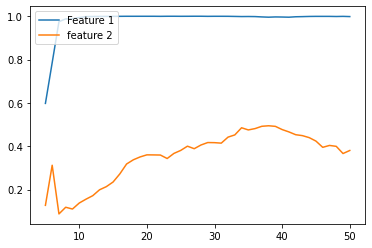

In [115]:
# Find the best number of neighbourhood (K) here
# Plot the value (correlation) you calculate 
# for selecting the best number of neighbourhood
# Find the best number of neighbourhood (K) here
# Plot the value (correlation) you calculate 
# for selecting the best number of neighbourhood
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from Code.lle import lle
from scipy.stats import pearsonr
n_components = 2
corr_1 = np.zeros(46)
corr_2 = np.zeros(46)

#X_1 = (X[0] - np.mean(X[0])) / np.std(X[0])
X_1 = (X[1] - np.mean(X[1])) / np.std(X[1])
for k in range(5,51):
    n_neighbors = k
    Y_K = lle(X , n_neighbors=n_neighbors, n_components=n_components)
    
    corr_1[k-5], p = pearsonr(angle,Y_K[0])
    corr_2[k-5], p = pearsonr(X_1,Y_K[1])
    
corr_1 = abs(corr_1)
corr_2 = abs(corr_2)
print(corr_1)
print(corr_2)
k = range(5,51)

plt.plot(k,corr_1,label='Feature 1')
plt.plot(k,corr_2,label='feature 2')
plt.legend(loc="upper left")
plt.show()

In [116]:
n_neighbors =  38 # put the best number here
n_components = 2
Y_K = lle(X , n_components=n_components, n_neighbors=n_neighbors)

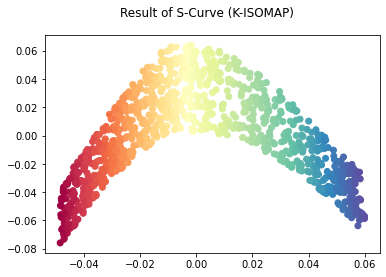

In [117]:
fig_s_curve_result = plt.figure()
fig_s_curve_result.suptitle('Result of S-Curve (K-ISOMAP)')
ax = fig_s_curve_result.add_subplot()
ax.scatter(Y_K[0,:],Y_K[1,:],**colorize);

[0.00575855 0.03503985 0.97845278 0.99400258 0.99473115 0.99939337
 0.99916548 0.99313097]
[0.06847736 0.04486658 0.13564872 0.20653865 0.21233464 0.23665085
 0.15783585 0.0609274 ]


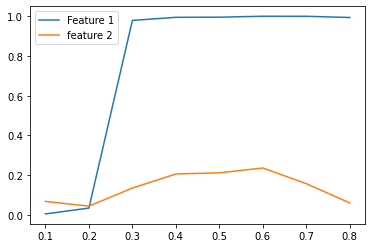

In [119]:
# Find the best radius (epsilon) here
# Plot the value (correlation) you calculate 
# for selecting the best radius (epsilon)
n_components = 2
corr_1 = np.zeros(8)
corr_2 = np.zeros(8)
n=0
for e in np.arange(0.1,0.9,0.1):
    epsilon = e
    Y_e = lle(X , n_components=n_components, epsilon=epsilon)
    #print(Y_K.shape)
    #print(Y_K[0].mean())
    
    #print(X_1.mean())
    corr_1[n], p = pearsonr(angle,Y_e[0])
    corr_2[n], p = pearsonr(X_1,Y_e[1])
    n = n + 1
corr_1 = abs(corr_1)
corr_2 = abs(corr_2)
print(corr_1)
print(corr_2)

k = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

plt.plot(k,corr_1,label='Feature 1')
plt.plot(k,corr_2,label='feature 2')
plt.legend(loc="upper left")
plt.show()




In [120]:
epsilon =  0.6# put the best radius here
n_components = 2
Y_e = lle(X , n_components=n_components, epsilon=epsilon)

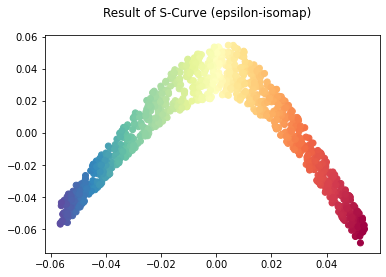

In [121]:
fig_s_curve_result_epsilon = plt.figure()
fig_s_curve_result_epsilon.suptitle('Result of S-Curve (epsilon-isomap)')
ax = fig_s_curve_result_epsilon.add_subplot()
ax.scatter(Y_e[0,:],Y_e[1,:],**colorize);

### <span style="color:red">============ End of Assignment 6 =========== </span>

### Example (Bar images)

In [19]:
from Code.dataset import bars

data_bar, centers = bars()
data_bar = data_bar.T
centers = centers.T
image_size = [40,40]

In [20]:
def reg_func(C, K):
    trace = np.trace(C)
    return 1e-3*trace*K*np.eye(K)

### <span style="color:red">============ Assignment 7 =========== </span>
<span style="color:red">
1. Run LLE with the bar dataset (bars.npz). <br/>
2. Find <b>the best K in K-ISOMAP</b> to embed the data into 2-D space. <br/>
3. Show LLE preserves the topological location of data. You can show this by displaying vertical bars and horizontal bars separately.<br/>
   
You may use <b>correlation coefficient</b> between the center coorinates of bars and embedded coordinates. You can get the center coordinates from the variable, <b>centers</b>, which are obtained from <b>bars()</b> with the data. To this end, a build-in function is provided from the scipy package to calculate the correlation coefficient of two vectors.(<b>scipy.stats.pearsonr</b>)

For K-ISOMAP, search the space ranging <b>from 40 to 60</b> with an interval of 1 and choose the best K.
</span> <br/><br/>

<span style="color:red">
    In terms of bar images, they are placed in the variable, <b>data_bar</b> and its center coordinates are in the variable, <b>centers</b>.<br/>
    The vertical bars are the index from 0 to 499 and the horizontal bars from 500 to 999. In total, there are 1000 bar images.
</span>

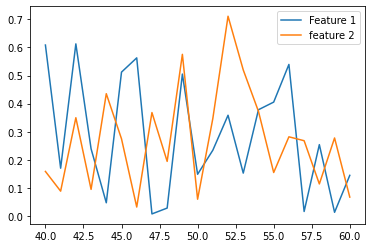

In [28]:
# Find the best number of neighourhood (K) here
# You should findthe best number of neighbors in the range from 40 to 60.
# Find the best number of neighourhood (K) here
# You should findthe best number of neighbors in the range from 40 to 60.
%matplotlib inline
n_components = 2

corr_1 = []
corr_2 = []
X_1 = (centers[0] - np.mean(centers[0])) / np.std(centers[0])
X_2 = (centers[1] - np.mean(centers[1])) / np.std(centers[1])
for k in range(40,61):
    n_neighbors = k
    Y_K = lle(data_bar , n_neighbors=n_neighbors, n_components=n_components)
    corr1, p =pearsonr(X_1,Y_K[0])
    corr2, p = pearsonr(X_2,Y_K[1])
    corr_1 = np.append(corr_1,corr1)
    corr_2 = np.append(corr_2,corr2)
    
corr_1 = abs(corr_1)
corr_2 = abs(corr_2)
#print(corr_1)
#print(corr_2)
k = range(40,61)

plt.plot(k,corr_1,label='Feature 1')
plt.plot(k,corr_2,label='feature 2')
plt.legend(loc="upper right")
plt.show()





In [29]:
# the best number of neighbors wil be 40-60.
n_neighbors = 48  #  put the best number (K). 
n_components = 2
Y_bar = lle(data_bar, n_components=n_components, 
             n_neighbors=n_neighbors, reg_func=reg_func)

<IPython.core.display.Javascript object>


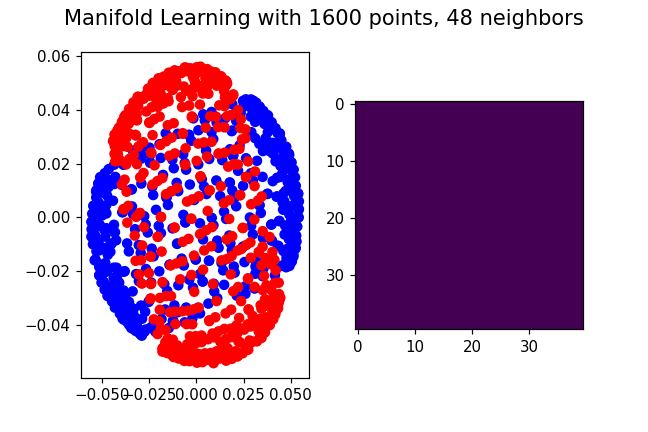

In [30]:
%matplotlib notebook
fig_bar = plt.figure()
fig_bar.suptitle("Manifold Learning with %i points, %i neighbors"
            % (data_bar.shape[0], n_neighbors), fontsize=14)
vis_both = VIS_Bars(data=data_bar, proj=Y_bar, fig_vis=fig_bar, 
                    image_size=image_size, both=True)

<IPython.core.display.Javascript object>


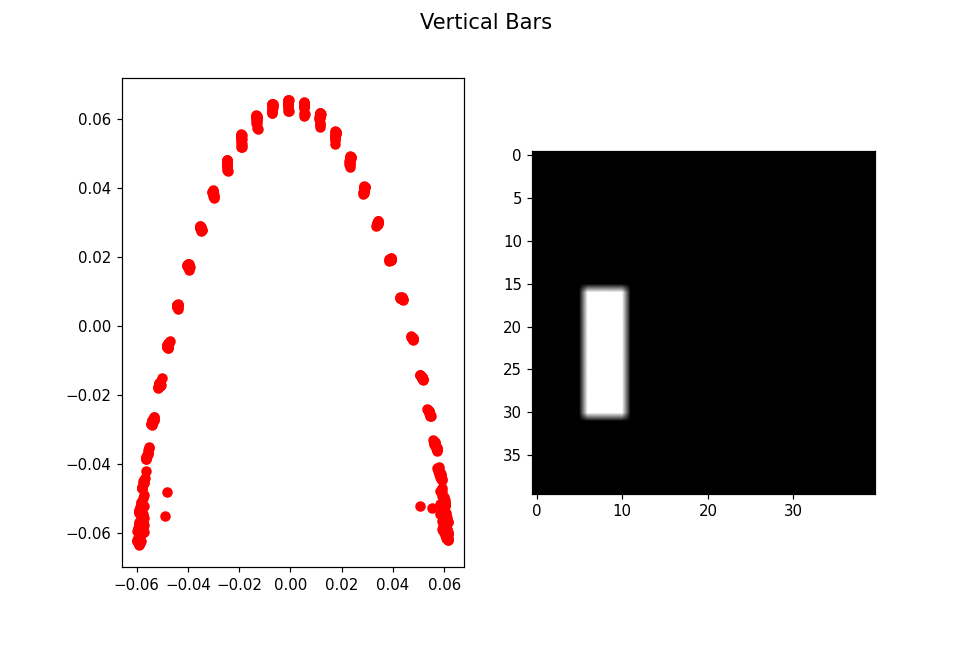

In [31]:
# Display the result of LLE regarding the vertical bars.
# The vertical bars are placed from 0 to 499 in the variable (data_bar).

n_neighbors = 48  #  put the best number (K). 
n_components = 2
data_bar_v = data_bar[:,0:500]
Y_bar_v = lle(data_bar_v, n_components=n_components, 
             n_neighbors=n_neighbors, reg_func=reg_func)
fig_v_bar = plt.figure()
fig_v_bar.suptitle("Vertical Bars", fontsize=14)
vis_v = VIS_Bars(data=data_bar_v, proj=Y_bar_v, fig_vis=fig_v_bar, 
                    image_size=image_size, both=False)

<IPython.core.display.Javascript object>


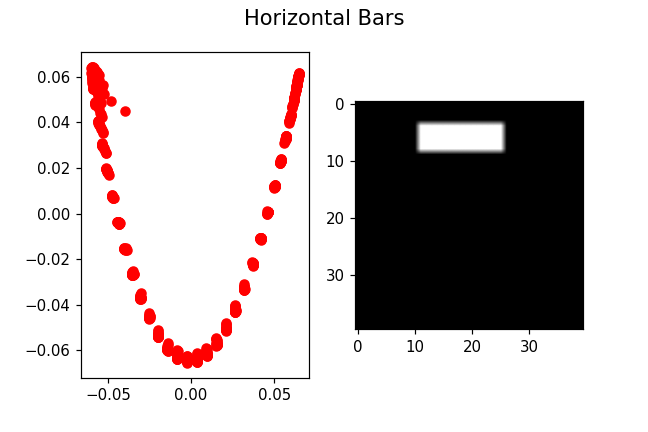

In [27]:
# Display the result of LLE regarding the horizontal bars.
# The vertical bars are placed from 500 to 999 in the variable (data_bar).

# Display the result of LLE regarding the vertical bars.
# The vertical bars are placed from 0 to 499 in the variable (data_bar).

n_neighbors = 48  #  put the best number (K). 
n_components = 2
data_bar_h = data_bar[:,500:1000]
Y_bar_h = lle(data_bar_h, n_components=n_components, 
             n_neighbors=n_neighbors, reg_func=reg_func)
fig_h_bar = plt.figure()
fig_h_bar.suptitle("Horizontal Bars", fontsize=14)
vis_h = VIS_Bars(data=data_bar_h, proj=Y_bar_h, fig_vis=fig_h_bar, 
                    image_size=image_size, both=False)

### <span style="color:red">============ End of Assignment 7 =========== </span>
<span style="color:red">